<a href="https://colab.research.google.com/github/fleventy-5/phishing_domain_detection/blob/master/phising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset_full.csv')
print(df.shape)
cols = df.columns.tolist()
print(cols)

print(df.isnull().mean().tolist())
print(df.nunique().tolist())

data=df.copy()

for i in cols:
  if len(df[i].unique()) == 1:
    data = data.drop(i,axis=1)

y = data['phishing']
print(y)

#data = data.drop(['phishing'],axis=1)



url_cols =[]
domain_cols = []
file_cols = []
param_cols =[]
dir_cols = []

for i in data.columns:
  if 'url' in i:
    url_cols.append(i)
  elif 'domain' in i:
    domain_cols.append(i)
  elif 'file' in i:
    file_cols.append(i)
  elif 'params' in i:
    param_cols.append(i)
  elif 'directory' in i:
    dir_cols.append(i)



url_cols.append('phishing')
domain_cols.append('phishing')
file_cols.append('phishing')
param_cols.append('phishing')
dir_cols.append('phishing')

print(url_cols)
print(domain_cols)
print(file_cols)
print(param_cols)
print(dir_cols)

'''for (i,j) in zip(url_cols,domain_cols):
  data = data.drop(i,axis=1)
  data = data.drop(j,axis=1)'''

df_url = data[url_cols]
df_domain = data[domain_cols]
df_file = data[file_cols]
df_param = data[param_cols]
df_dir = data[dir_cols]




(88647, 112)
['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url', 'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url', 'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url', 'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url', 'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain', 'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain', 'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain', 'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain', 'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain', 'qty_dollar_domain', 'qty_percent_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip', 'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_director

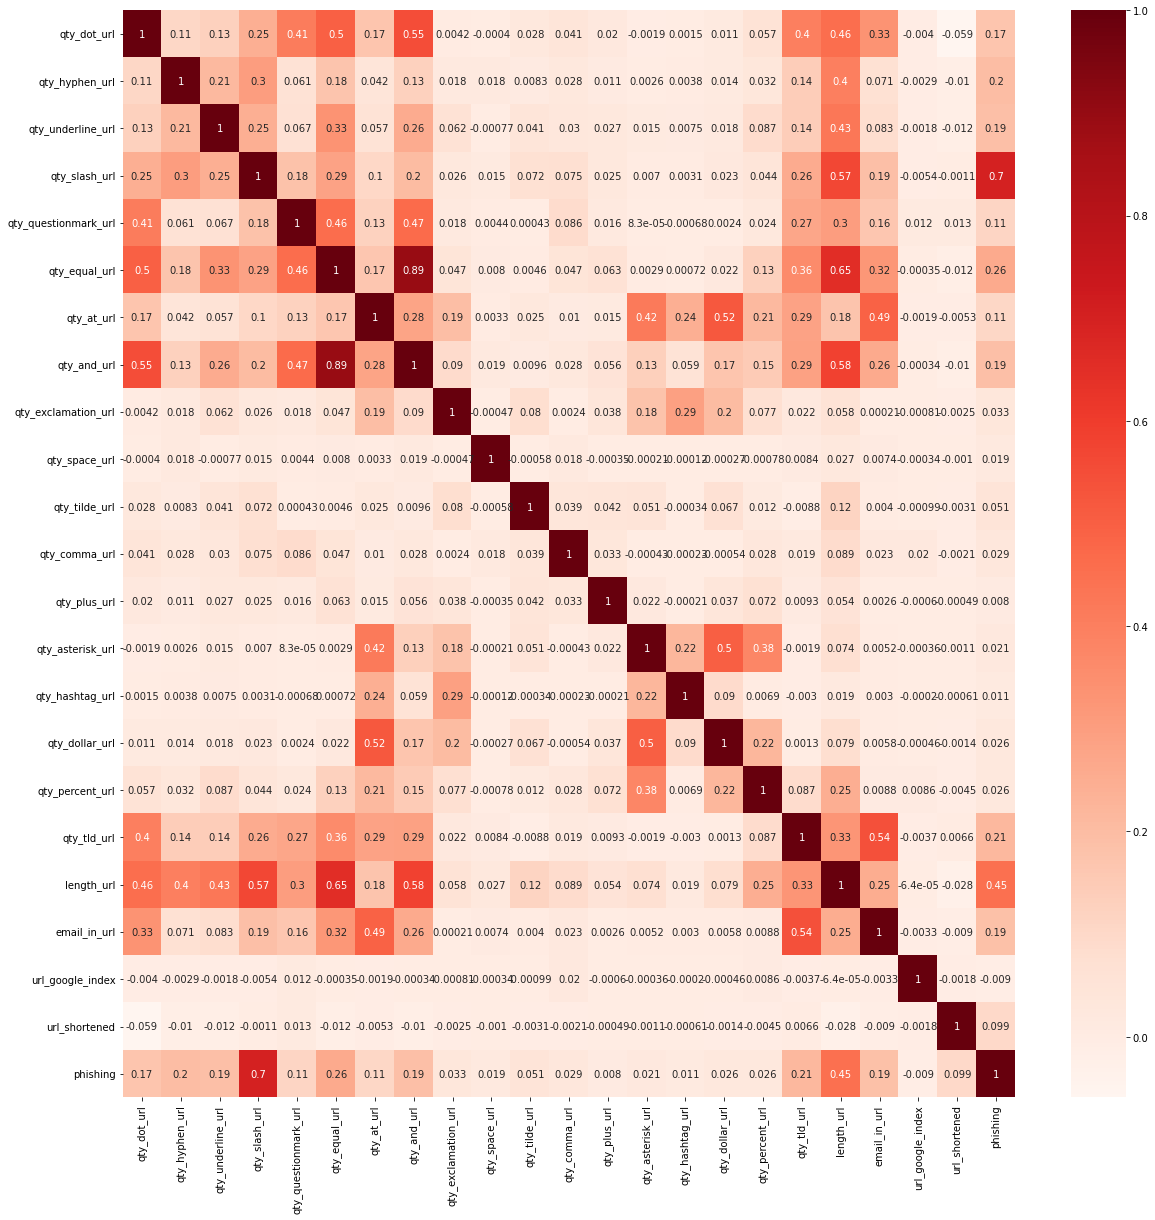

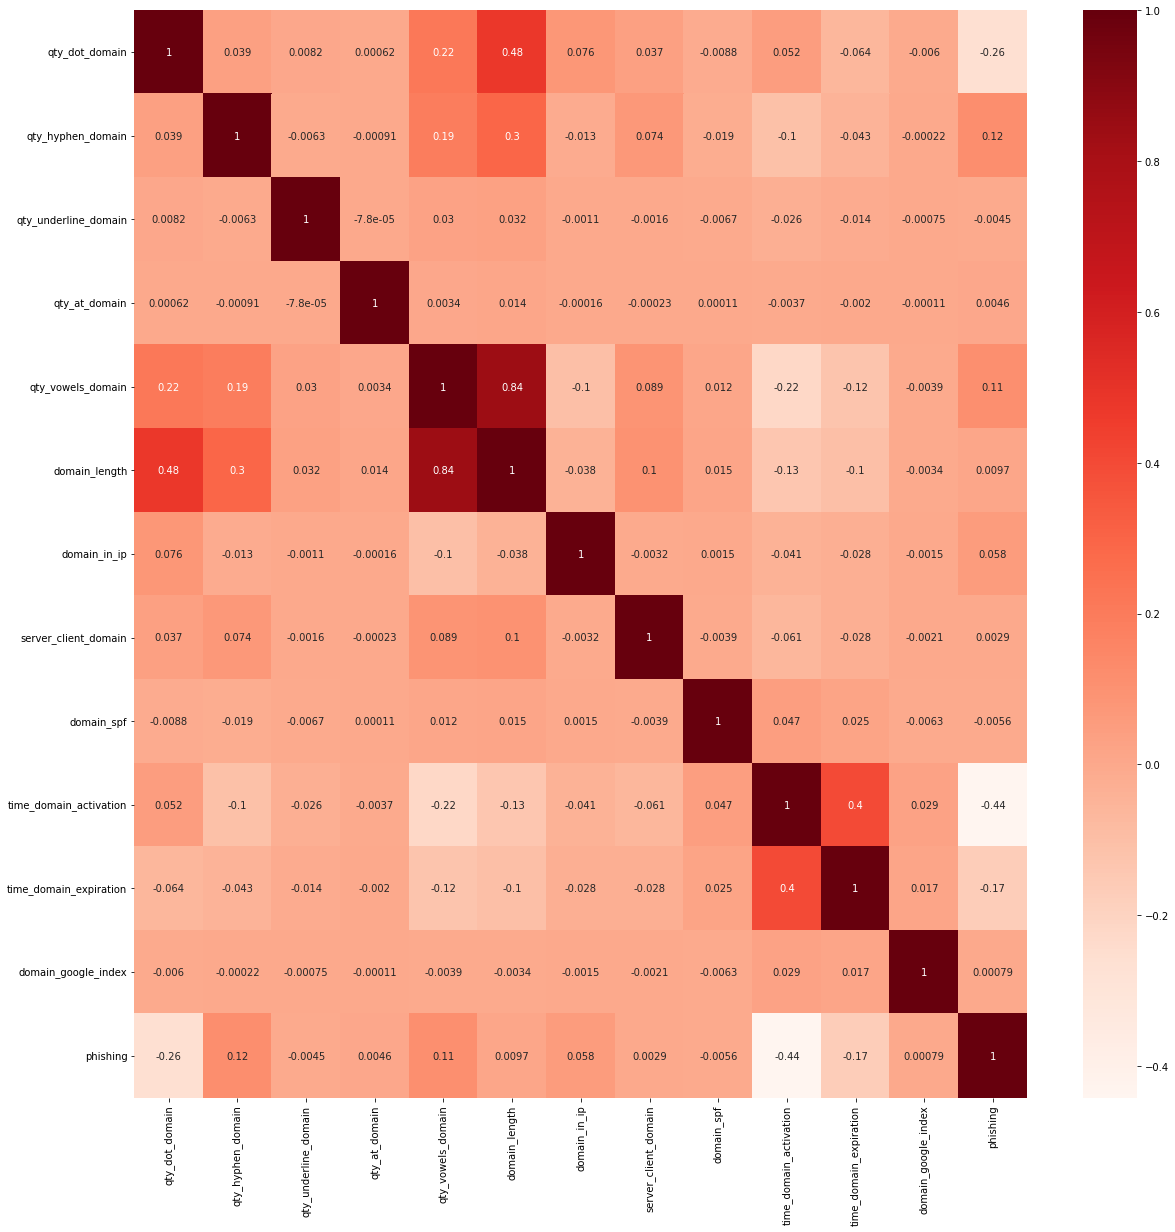

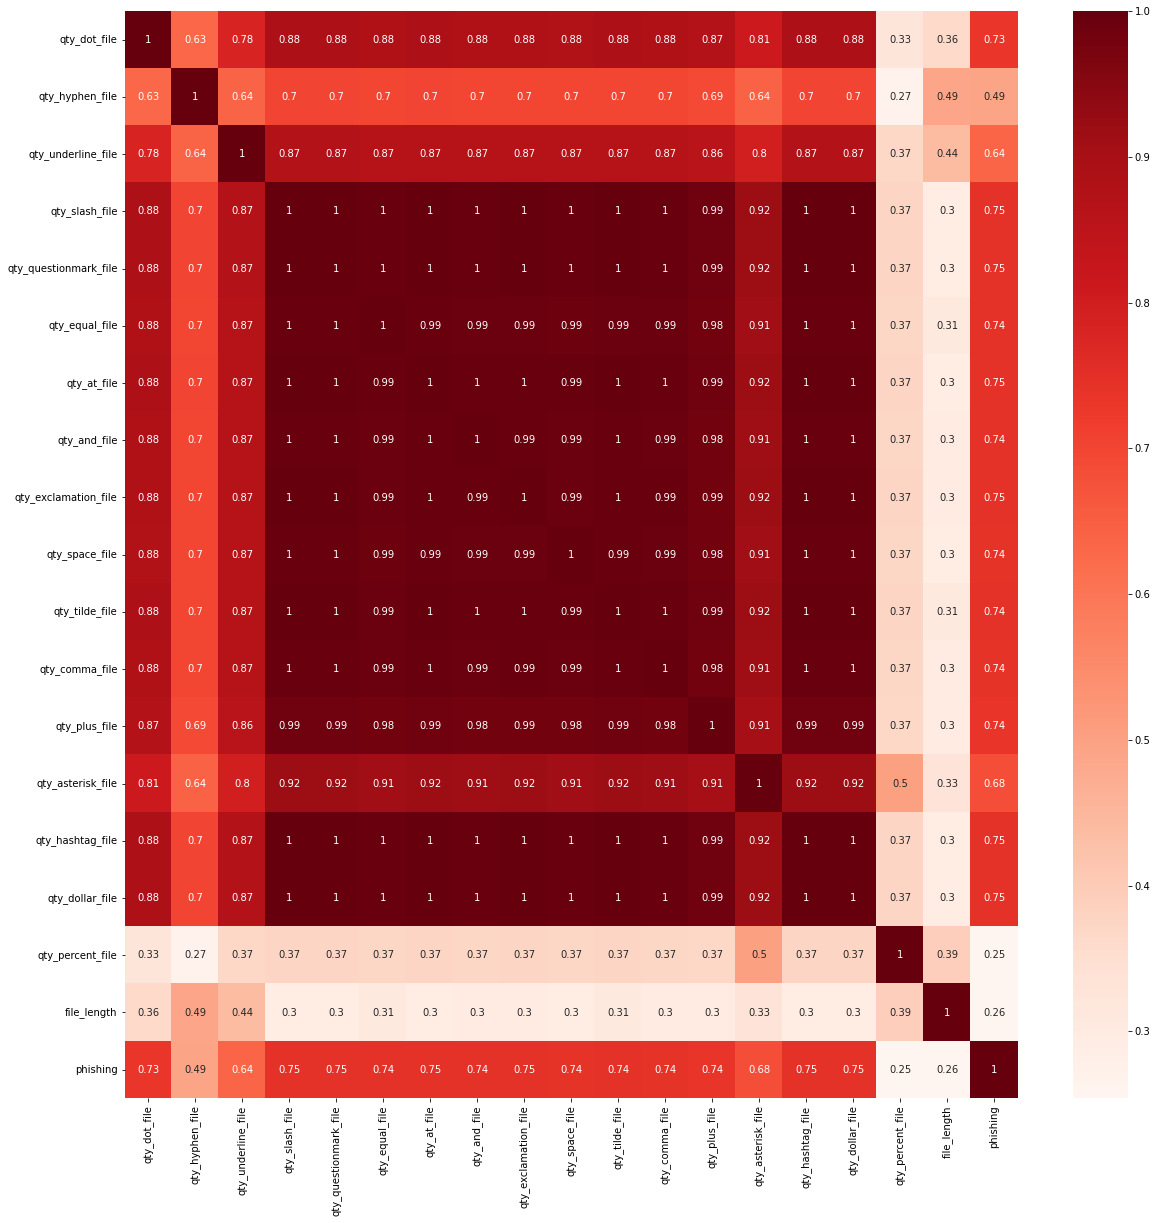

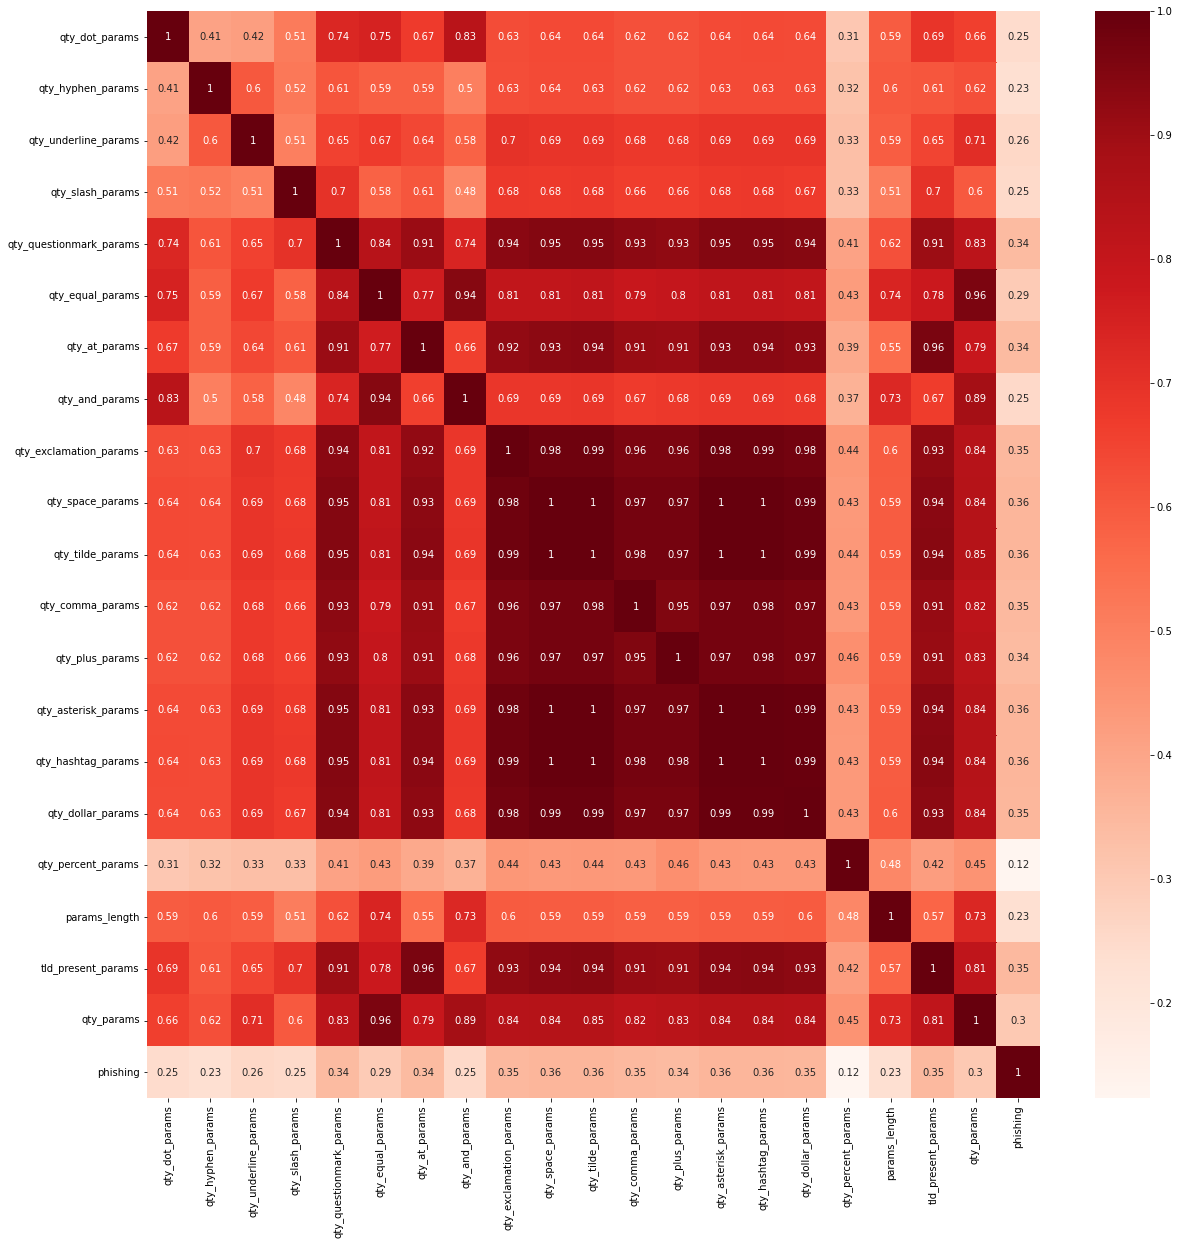

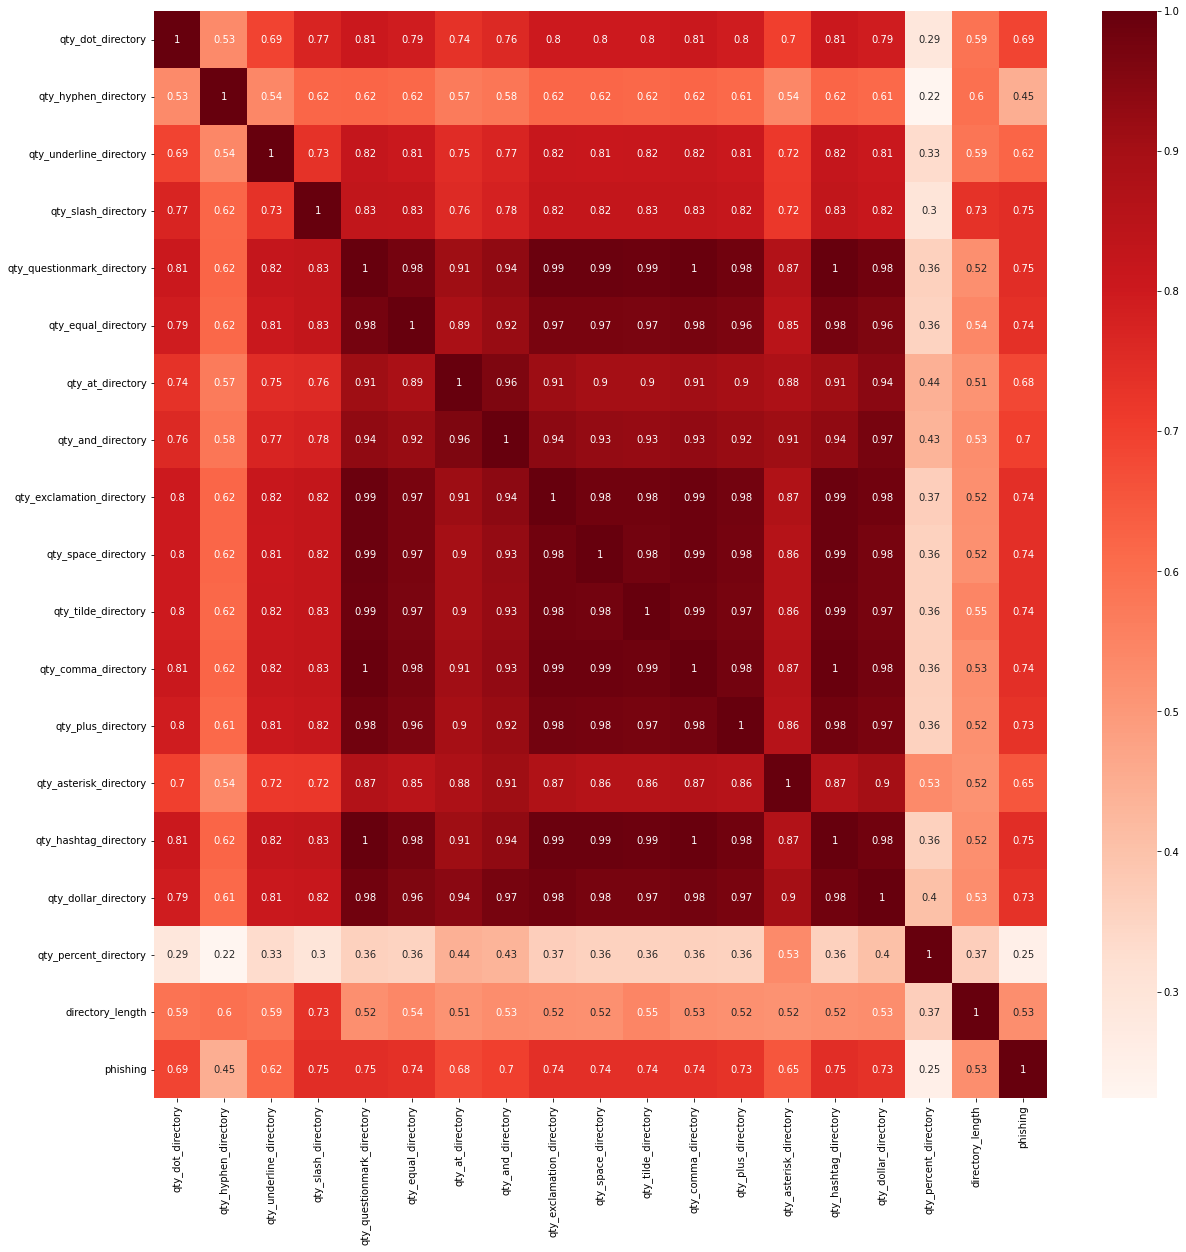

In [ ]:
'''plt.figure(figsize=(12,10))
sns.heatmap(cor_cols, annot=True, cmap=plt.cm.Reds)
plt.show()'''

plt.figure(figsize=(20,20))
sns.heatmap(df_url.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(df_domain.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(df_file.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(20,20))
sns.heatmap(df_param.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()
plt.figure(figsize=(20,20))
sns.heatmap(df_dir.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()



In [ ]:
cor = data.corr()
cor_target = abs(cor['phishing'])
corr_features = cor_target[cor_target>0.5]
print(corr_features)
print(len(corr_features))

df_cor = corr_features.to_frame()

features = df_cor.index.tolist()
features.pop()
print(features)

qty_slash_url                 0.699061
qty_dot_directory             0.690271
qty_underline_directory       0.623106
qty_slash_directory           0.746454
qty_questionmark_directory    0.745644
qty_equal_directory           0.737922
qty_at_directory              0.682272
qty_and_directory             0.702265
qty_exclamation_directory     0.742187
qty_space_directory           0.740026
qty_tilde_directory           0.739571
qty_comma_directory           0.742251
qty_plus_directory            0.732842
qty_asterisk_directory        0.651520
qty_hashtag_directory         0.745644
qty_dollar_directory          0.734923
directory_length              0.525694
qty_dot_file                  0.733008
qty_underline_file            0.636585
qty_slash_file                0.745644
qty_questionmark_file         0.745644
qty_equal_file                0.743692
qty_at_file                   0.745509
qty_and_file                  0.744860
qty_exclamation_file          0.745059
qty_space_file           

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler()

X_train,X_test, y_train,y_test = train_test_split(scale.fit_transform(data[features]),y,test_size=0.2,random_state=1)


X_train.shape[1]



32

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)
y_pred1= model1.predict(X_test)

print(model1.score(X_test,y_test))
print(accuracy_score(y_test,y_pred1))

0.8954314720812183
0.8954314720812183


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=100)
model2.fit(X_train,y_train)

y_pred2=model2.predict(X_test)

print(model2.score(X_test,y_test))
print(accuracy_score(y_test,y_pred2))

0.8965595036661026
0.8965595036661026


In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN

model3 = KNN(n_neighbors=3)

model3.fit(X_train,y_train)

y_pred3 = model3.predict(X_test)

print(model3.score(X_test,y_test))
print(accuracy_score(y_test,y_pred3))

0.8894529046813311
0.8894529046813311


In [ ]:
from sklearn.naive_bayes import GaussianNB as GNB

model4 = GNB()
model4.fit(X_train,y_train)

y_pred4 = model4.predict(X_test)

print(model4.score(X_test,y_test))
print(accuracy_score(y_test,y_pred4))

0.8632261703327693
0.8632261703327693


In [ ]:
from tensorflow.keras  import  Sequential
from tensorflow.keras.layers import Dense,Flatten


model5 = Sequential()

model5.add(Dense(32,input_shape=(X_train.shape[1],),activation='relu'))
model5.add(Dense(64,activation='relu'))
model5.add(Dense(128,activation='relu'))
model5.add(Flatten())
model5.add(Dense(1,activation='sigmoid'))

model5.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model5.summary()

model5.fit(X_train,y_train,verbose=2,epochs=10)
model5.evaluate(X_test,y_test)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 128)               8320      
                                                                 
 flatten_2 (Flatten)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,617
Trainable params: 11,617
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
2217/2217 - 10s - loss: 0.2851 - accura

[0.25978463888168335, 0.8824591040611267]

In [ ]:
ML_Model = ['DecisionTreeClassifier','RandomForestClassifier','KNN','GNB','Neural Net']
acc_train = [model1.score(X_train,y_train),model2.score(X_train,y_train),model3.score(X_train,y_train),model4.score(X_train,y_train),model5.evaluate(X_test,y_test)[1]]
acc_test = [model1.score(X_test,y_test),model2.score(X_test,y_test),model3.score(X_test,y_test),model4.score(X_test,y_test),model5.evaluate(X_test,y_test)[1]]
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

555/555 [==============================] - 1s 2ms/step - loss: 0.2598 - accuracy: 0.8825


,ML Model,Train Accuracy,Test Accuracy
0,DecisionTreeClassifier,0.906313,0.895431
1,RandomForestClassifier,0.906313,0.896560
2,KNN,0.917114,0.889453
3,GNB,0.865110,0.863226
4,Neural Net,0.882459,0.882459


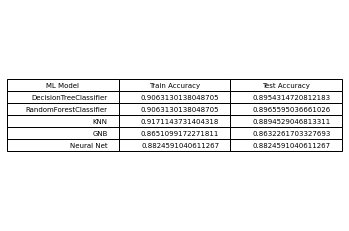

In [ ]:
fig, ax =plt.subplots(1,1)

ax.axis('tight')
ax.axis('off')
ax.table(cellText=results.values,colLabels=results.columns,loc="center")

#plt.show()
plt.savefig('my_plot.png')

In [ ]:
import pickle
with open('model1.pkl', 'wb') as file:
  pickle.dump(model1, file)

with open('model2.pkl', 'wb') as file:
  pickle.dump(model2, file)

with open('model3.pkl', 'wb') as file:
  pickle.dump(model3, file)

with open('model4.pkl', 'wb') as file:
  pickle.dump(model4, file)